# <center>Mini-projet: fonction Height</center>



# Sommaire
1. [Interpolation polynomiale](#paragraph1)
2. [Méthodes de quadrature](#paragraph2)
3. [Extrapolation de Richardson](#paragraph3)
4. [Annexe](#paragraph4)

In [1]:
source('mesfonctions.R')
load('projectData.Rdata')
source('evalTools.R')

Dans la suite du rapport, on appellera pour les tests les fonctions présentes dans $\textit{mesfonctions.R}$. 

## 1. Interpolation polynomiale <a name="paragraph1"></a>

1. (a) 4 exemples ci-dessous avec la fonction Height en utilisant l'interpolation simple qui montre les limites de cette méthode pour des degrés trop grand ou trop petit.

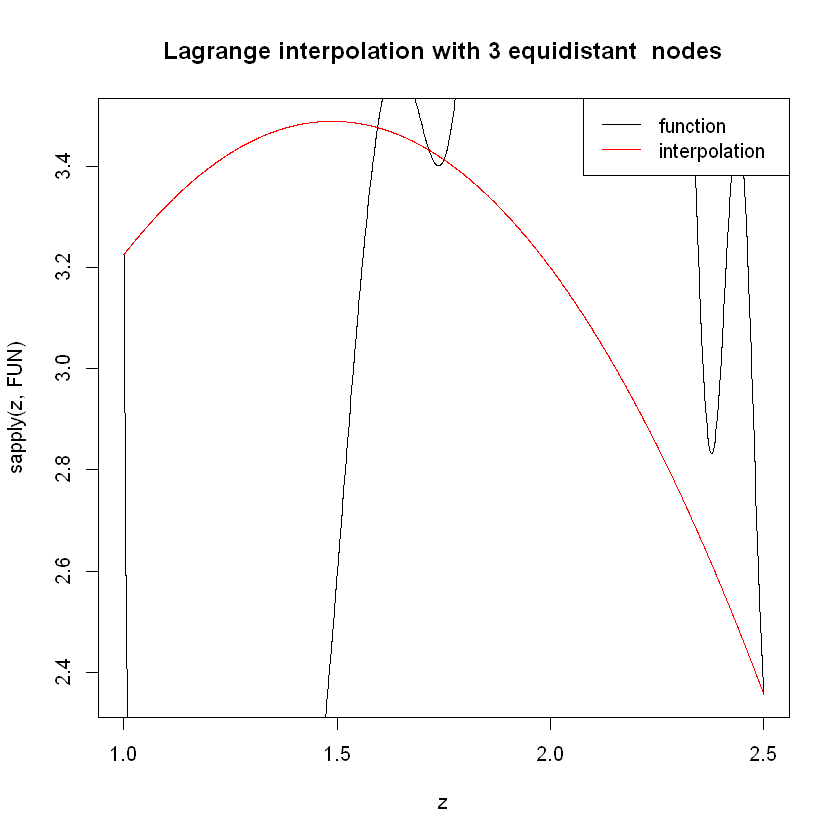

In [2]:
u = interpolLagrange(n = 2, a = 1, b = 2.5, neval = 2000, nodes = "equi", FUN = evalHeight, Plot = TRUE)

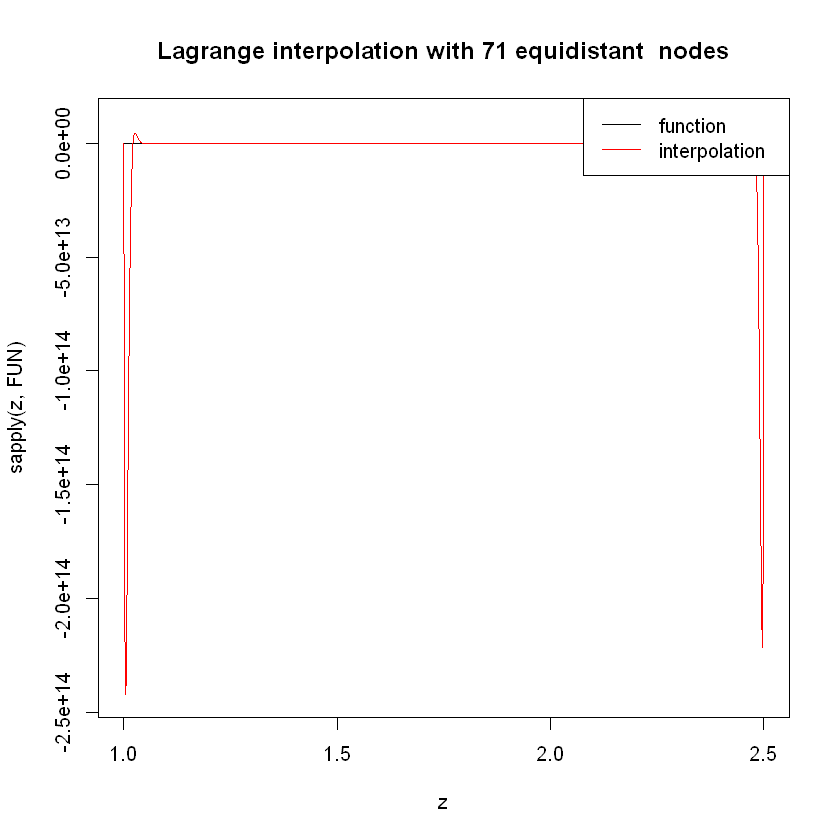

In [3]:
u = interpolLagrange(n = 70, a = 1, b = 2.5, neval = 2000, nodes = "equi", FUN = evalHeight, Plot = TRUE)

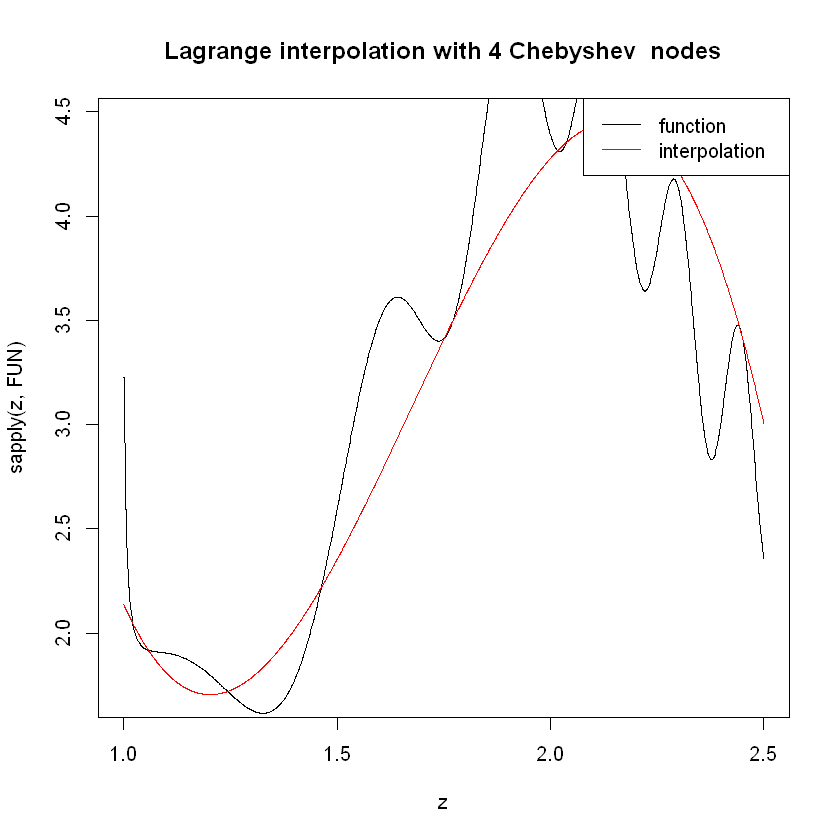

In [4]:
u = interpolLagrange(n = 3, a = 1, b = 2.5, neval = 2000, nodes = "cheby", FUN = evalHeight, Plot = TRUE)

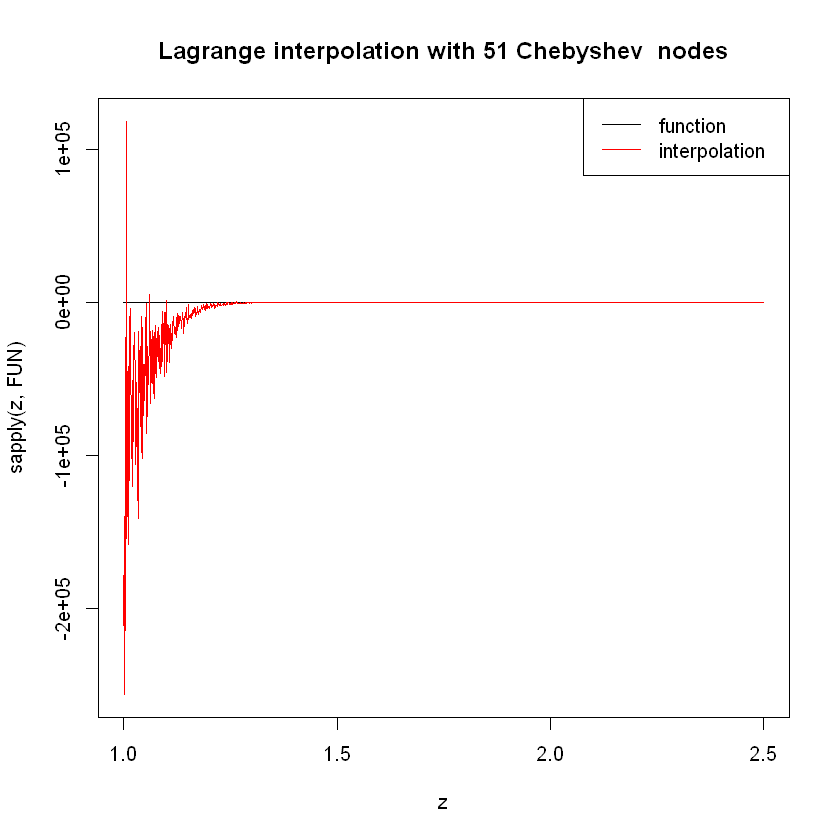

In [5]:
u = interpolLagrange(n = 50, a = 1, b = 2.5, neval = 1500, nodes = "cheby", FUN = evalHeight, Plot = TRUE)

1.(b) Un bon interpolateur est a priori est donné pour des points de Chebyshev et un dégré pas trop élevé (inférieur à 44) mais pas trop faible non plus (supérieur à 3)

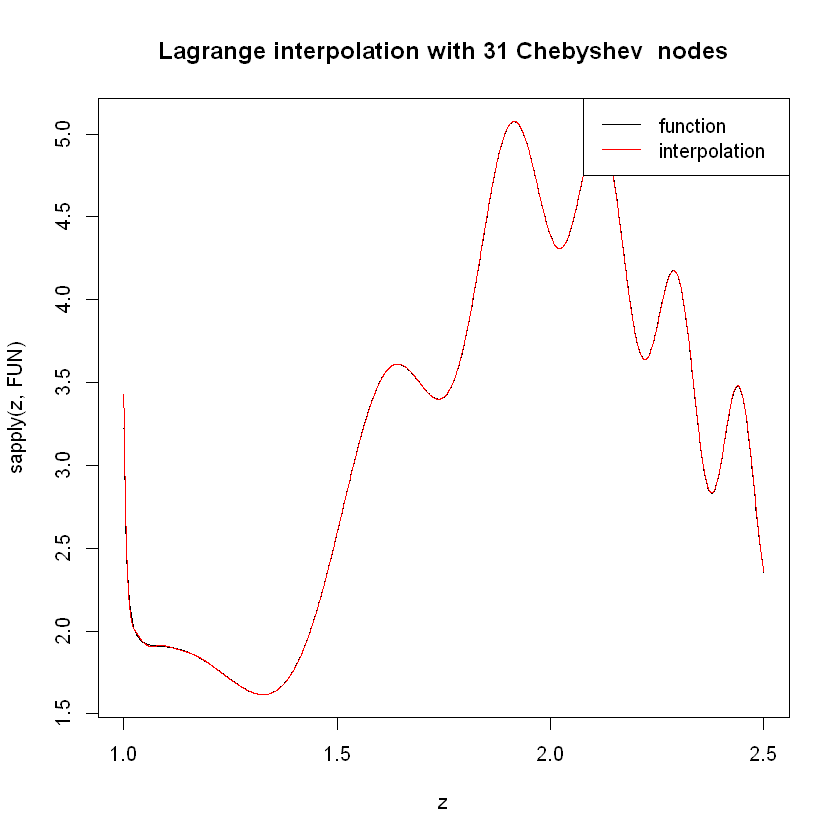

In [6]:
u = interpolLagrange(n = 30, a = 1, b = 2.5, neval = 2000, nodes = "cheby", FUN = evalHeight, Plot = TRUE)

1.(c) D'après les questions précédentes, on a l'intuition que l'on peut ramener ce problème de minimisation sur un ensemble fini dénombrable pour les valeurs de l'ordre de l'interpolateur, qu'il s'agisse des points équidistants ou des points de Chebyshev. Le phénomène de Runge se manifeste aux bords et on remarque que dès que l'on dépasse un certain seuil, les oscillations aux bords de l'intervalle d'interpolation sont très importantes. En vertu du théorème de Runge, on peut affirmer la convergence du polynôme d'interpolation d'ordre n pour $n \rightarrow +\infty$ hors des bords. Les quelques expériences nous montrent que l'on va trouver un minimiseur acceptable en fixant le seuil inférieur aux valeurs les plus élevées que l'on a pris précédemment. Il n'y a pas de preuve qui nous dise que l'on ne va pas trouver un minimum pour $n=100$, mais j'en doute. Graphiquement, on comprend bien que si on rajoute des points d'interpolation aux bords, les oscillations qui sont présentes au degré précédent resteront même s'il est possible que leur amplitude soit plus faible. En outre, d'autres oscillations apparaîtront. On s'éloigne d'une suite de polynômes optimaux tendant vers cette fonction donnée par le théorème de Weirstrass. Donc il semble peu probable d'avoir le minimum pour des dégrés très élevés, disons supérieurs à 100. 

Au vu de la continuité apparente de la fonction Height, la norme infinie de la différence entre cette fonction et un polynôme est atteinte, c'est-à-dire que c'est un maximum. 

J'ai écrit une fonction $\textbf{errMinOrder}$ qui teste tous les degrés afin de déterminer l'erreur d'interpolation minimale. Dans la boucle for on ne déparassera pas 100 itérations.

In [7]:
errMinOrder(orderMax = 100, a = 1, b = 2.5, neval = 10^4, nodes = "equi", FUN = evalHeight)

[1] "Order_min=  3 Error=  1.03595579478903"

In [8]:
errMinOrder(orderMax = 100, a = 1, b = 2.5, neval = 10^4, nodes = "cheby", FUN = evalHeight)

[1] "Order_min=  37 Error=  0.147940567318757"

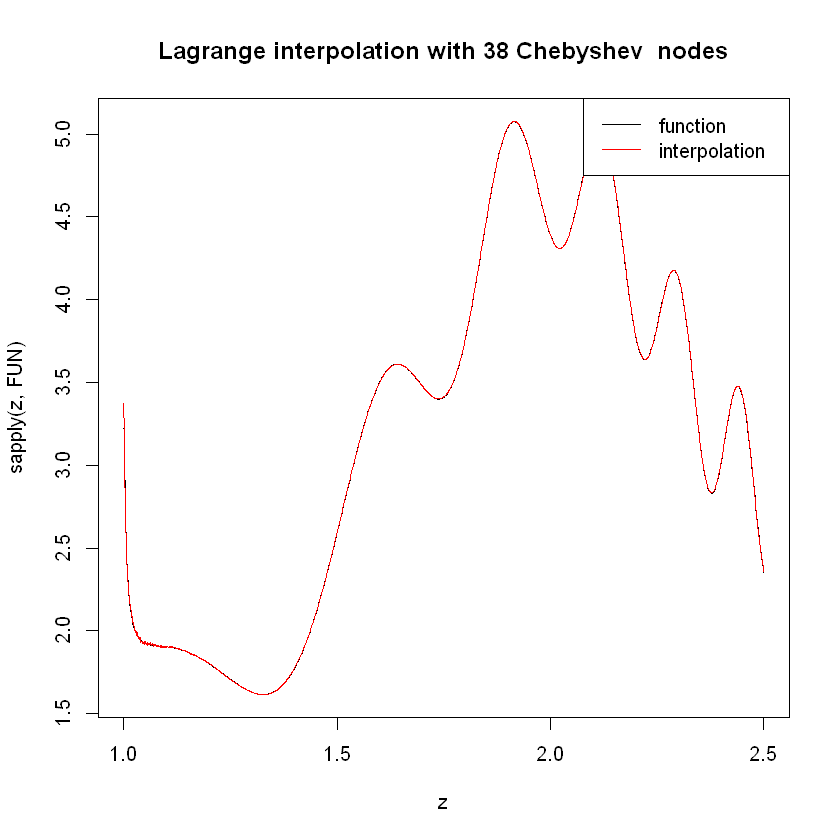

In [9]:
u = interpolLagrange(n = 37, a = 1, b = 2.5, neval = 2000, nodes = "cheby", FUN = evalHeight, Plot = TRUE)

Voici ci-dessus les interpolations qui semblent optimales en prenant des points équidistants ou de Chebyshev. On remarque que pour les points équidistants, la forme du polynôme n'est pas satisfaisante. En effet, le critère de la norme infinie n'est pas très fort, mais nous permet quand même de voir que de toutes manières interpoler comme précédemment avec des poins équidistants n'est pas une bonne idée. En revanche, on obtient une courbe satisfaisante avec des points de Chebyshev.

2. On s'autorise à faire de l'interpolation par morceaux.

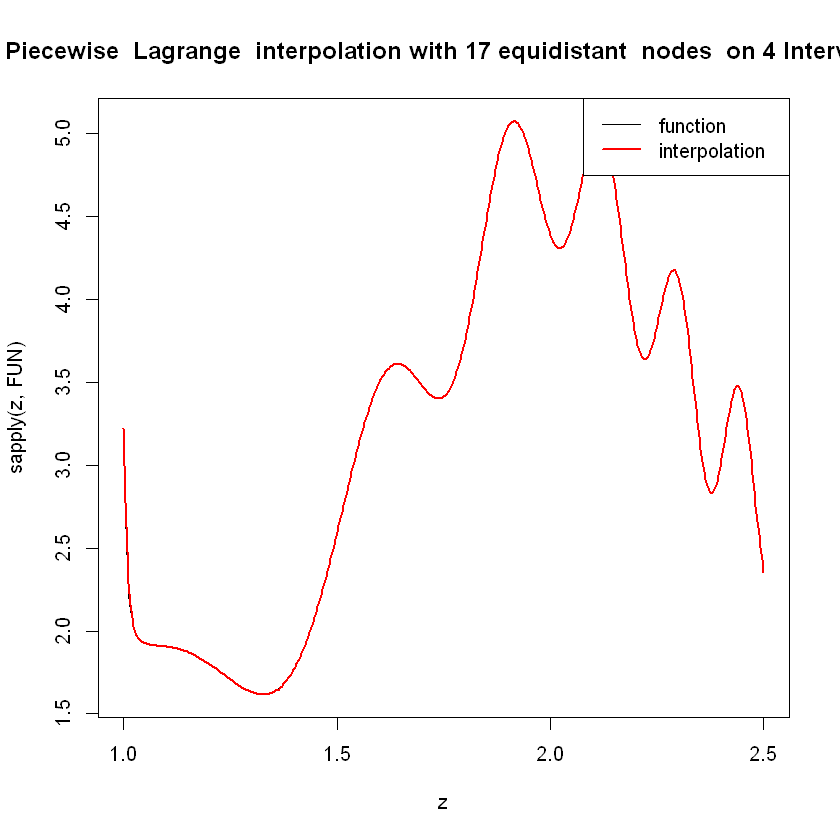

In [10]:
piece = piecewiseInterpol(n = 16, nInt = 4, a = 1, b = 2.5, neval = 100, nodes = "equi", FUN = evalHeight, Plot = TRUE)

2.(a) Cet interpolateur ci-dessus est satisfaisant visuellement car il épouse bien la forme de la courbe. Le degré du polynôme est grand mais ne dépasse pas 20. Cela peut être lourd si on a besoin de répéter plusieurs fois ce type calcul.

2.(b) Ici, on a écrit une fonction $\textbf{errMinPiece}$ qui compare la configuration $(n_{points}, n_{intervalles})$ qui donne l'erreur d'interpolation minimale pour des points équidistants ou de Chebyshev, puis on prend la méthode qui donne l'erreur minimale parmi les deux. Cela nous donnera donc la configuration $(n_{points}, n_{intervalles}, méthode)$ qui donne l'erreur d'interpolation minimale. Pour se limiter au budget, j'ai simplement pris la grille par morceaux sur $[a,b]$ donné par $\textbf{piecewiseInterpol}$ et je me suis assuré que le nombre de points dessus était inférieur à 80.

J'ai considéré $10^4$ comme le nombre maximal de points d'évaluation sur $[a,b]$.

Pour comparer les normes infinies, j'ai fait le choix de calculer les normes infinies sur le nombre le plus proche possible de $10^4$ sans dépasser quelque soit le nombre d'intervalles dans la fonction $\textbf{piecewiseInterpol}$, donc en pratique je n'utilise pas exactement le même nombre de points pour déterminer la norme infinie de l'interpolateur par morceaux selon le nombre d'intervalles. Ce choix d'implémentation peut expliquer les différences de résultats. 

In [11]:
errMinPiece(budget = 80, a = 1, b = 2.5, neval = 10^4, FUN = evalHeight)

[1] "Chebyshev nodes"


[1] "Number of nodes per intervals=  35 , Number of intervals=  2 , Error=  0.124118925796764"

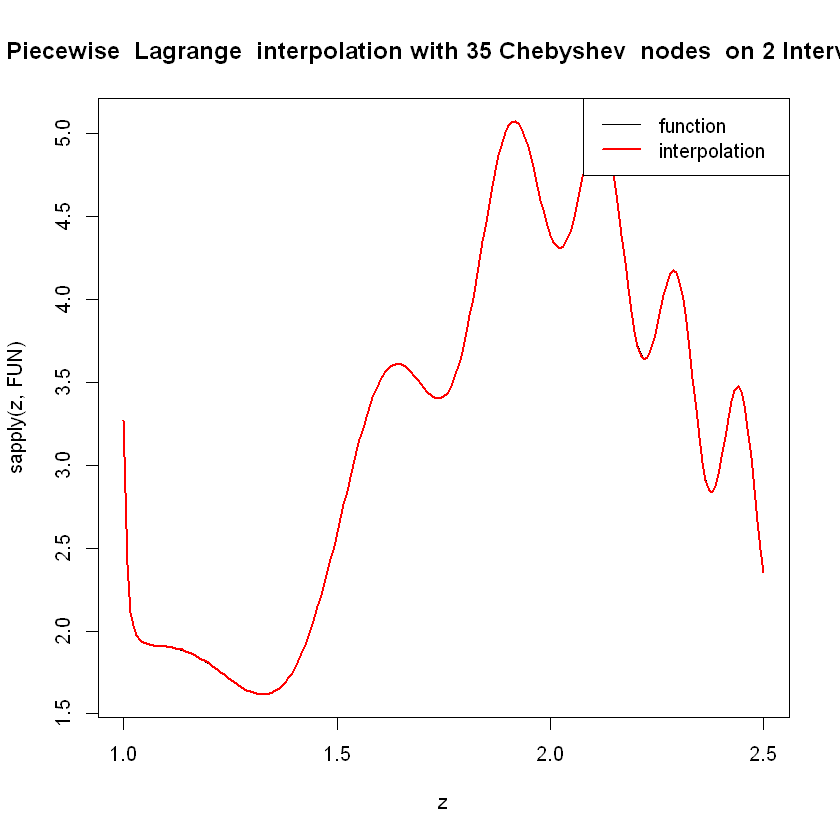

In [12]:
piece = piecewiseInterpol(n = 34, nInt = 2, a = 1, b = 2.5, neval = 100, nodes = "cheby", FUN = evalHeight, Plot = TRUE)

Ici, on a une forme très satisfaisante de la courbe de l'interpolateur, mais aussi une norme infinie de la différence minimale. Néanmoins, j'ai pu remarqué qu'il y a plusieurs configurations ayant des erreurs d'interpolations entre 0.12 et 0.16 qui peuvent être intéressantes si on veut un degré plus faible pour le polynôme, par exemple 29 au lieu de 35 ou même en augmentant le nombre d'intervalles et en diminuant le nombre de noeuds par morceaux (22, 3 par exemple). Pour l'interpolation simple, on a une erreur d'interpolation de 0,14 pour des noeuds de Chebyshev, mais on parvient à gagner un peu en précision avec une interpolation en 2 morceaux, faisant descendre l'erreur à 0,12.

Pour la valeur de l'erreur, j'ai fait en sorte de calculer la norme infinie sur une $\underline{plage\:de \:n_{points\:dans\:intervalle} * n_{intervalles}}$ qui s'approche le plus possible de $\underline{10^4}$. A priori, la configuration donnant le minimum peut varier selon la plage de valeurs utilisées.

## 2. Méthodes de quadrature <a name="paragraph2"></a>

1.(a) La méthode de Simpson composite nous donne l'expression suivante pour l'intégrale $\int_a^b f$. Pour ce qui suit, au vu du graphe de la fonction sur l'intervalle ouvert $]a,b[$, on supposera qu'elle possède les propriétés de régularité qui permettent de calculer une majoration de l'erreur d'interpolation.


In [13]:
tab = (30:100)
for (M in (30:100)){
    tab[M - 29] = simpsonInt(FUN = evalHeight, a = 1, b = 2.5, M)
}
tab

[1] 4.828418 4.827729 4.827412 4.827602 4.827900 4.827922 4.826587 4.826764
 [9] 4.826264 4.826304 4.826048 4.825617 4.826170 4.826165 4.826075 4.825358
[17] 4.826087 4.825661 4.825643 4.825436 4.825864 4.824923 4.825042 4.824976
[25] 4.825384 4.826528 4.825041 4.824910 4.825252 4.824933 4.825001 4.825356
[33] 4.824959 4.825330 4.825062 4.825029 4.825022 4.824837 4.825119 4.825177
[41] 4.826093 4.824933 4.824825 4.825316 4.825044 4.824698 4.824817 4.826051
[49] 4.825004 4.825002 4.824726 4.824577 4.824859 4.824994 4.824810 4.824260
[57] 4.825256 4.824539 4.824550 4.824708 4.825090 4.824659 4.825185 4.825145
[65] 4.824988 4.824793 4.824758 4.824833 4.824794 4.824914 4.824887

1.(a) Au vu des valeurs obtenues ci-dessus, on commet une erreur au centième près pour des valeurs de M entre 30 et 100. 
Et on peut donner une première estimation pour l'intégrale à 4,8245, tout cela à vue d'oeil.

1.(b) i.On a droit à $2 \times 20 + 1$ évaluations, soit 20 sous-intervalles d'intégration avec ce budget.

ii. On reprend l'expression exacte de l'erreur en annexe que l'on résume ainsi :

$$\hat{I}^{simp}_M(f) = \sum_{m=0}^{M-1} \hat{I}^{simp}_{a+mh,\:a + (m+1)h} (f) $$

où $\hat{I}^{simp}_{c,\:d} (f) = \frac{d-c}{6} \left(f(c) + f(d) + 4f(\frac{c+d}{2})\right)$ désigne la valeur de l'intégrale pour la méthode de Simpson simple.

$$\boxed{|Errcmp(f)_M| = K \frac{|f^{(4)}(\xi_{M})|}{M^4}}$$

où K est une constante indépendante de $M$ et de la fonction $f$.
On supposera que $|f^{(4)}(\xi_{M})|$ ne varie pas trop en fonction de $M$ pour faire l'appoximation suivante :
$$\underline{Errcmp(f)_{2M} \:/\: Errcmp(f)_M  \simeq  \frac{1}{2^4} = 1/16}$$


Donc : 

$$Errcmp(f)_{M} \: - \: Errcmp(f)_{2M}  = \hat{I}^{simp}_{2M}(f) - \hat{I}^{simp}_M(f)$$

D'où :

$$\underline{Errcmp(f)_{2M}  \simeq \frac{-1}{15}\left(\hat{I}^{simp}_{2M}(f) - \hat{I}^{simp}_M(f)\right)}$$


In [14]:
#Pour M = 2*10 (l'erreur est donné en 2M)
evalErrSimpson(FUN = evalHeight,a = 1, b = 2.5, M = 10)[1]

[1] 0.003717714

2. On utilise les considérations précédentes pour déterminer un algorithme où on double la valeur de M tant que l'erreur pour 2M est supérieure à la précision indiquée. Ainsi, on n'aura pas forcément le M le plus petit tel que la quadrature respecte les contraintes, mais c'est a priori le plus petit possible que l'on peut obtenir à partir de l'approximation. Néanmoins, dans ce cas ces considérations notamment le fait que $f^{(4)}(\xi_{M})$ n'est pas si différent de $f^{(4)}(\xi_{2M})$ peuvent s'avérer fausse, donc en prend une marge pour l'erreur pour une précision $\delta$ donnée, on a :
$$\underline{\frac{1}{15}\left(\hat{I}^{simp}_{M}(f) - \hat{I}^{simp}_{2M}(f)\right)}| \leq \frac{\delta}{10}$$

L'algorihtme utilisé ci-dessous utiliser ce critère pour déterminer un M satisfaisant. C'est le mieux que l'on puisse faire pour réduire le nombre d'itérations pour la recherche de M.

In [15]:
precisionMSimspon(FUN = evalHeight, a = 1, b = 2.5, init = 1, precision = 0.00005) 

[1] 256

In [16]:
#Pour M = 2*128 (l'erreur est donnée en 2M)
evalErrSimpson(FUN = evalHeight, a = 1, b = 2.5, M = 128)[1]

[1] -8.921423e-06

On obtient ici une valeur de 256. C'est une valeur peut-être trop grande, mais vu les approximations faites, il est référable d'avoir une bonne marge au lieu de se tromper de précision d'autant plus que le temps de calcul dans notre cas n'est pas limitant quand M varie de quelques dizaines ou quelques centaines.

## 3. Extrapolation de Richardson <a name="paragraph3"></a>

Etant donné la précision de nos données, il faut que l'interpolation soit juste pour un bon nombre de points et que ces points soient dans l'intervalle $[1, 2,5]$. Or, il faut que l'on puisse prendre une grille de points de Richardson dans l'intervalle $[1 + 2^{-10}; 2,5]$ telle que la fonction ne soit pas constante par morceaux. Soit $n$ l'exposant maximal,

D'où : $t \times \delta^{n-1} (1-\delta) \geq 2^{-10}$, et $t \leq 1,5 $ soit : 

En prenant $\delta = 1/2$, on a :  $log_2(t) + nlog_2(\delta)\leq -10 $,
soit : $n \leq |\frac{10 + log_2(t)}{log_2(\delta)}|$

Par exemple prenons $t=1$, et on a donc $n \leq 10$ 

Comme on dispose de la fonction evalHeight, on peut se permettre d'augmenter n, mais après de $n=10$, la fonction de référence est alors constante. 

L'implémentation de l'algorithme donnant lieu à la fonction $\textbf{richardson}$ utilise les résultats en annexe. 

[1] 4.386272 1.998077 1.327628 2.079277 1.905086 2.008407 2.224148 2.545156
 [9] 2.895456 3.177800 3.354026 3.197633 3.227394 3.225157 3.225233 3.225232

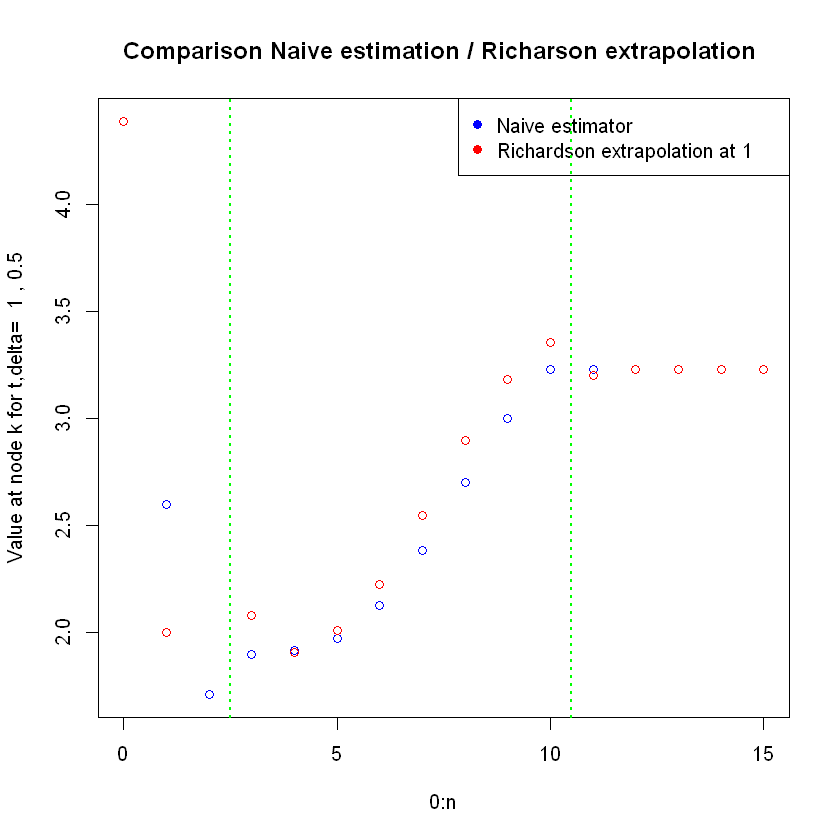

In [17]:
n = 15
rich = richardson(FUN = evalHeight, n, t = 1, delta = 0.5, start = 1, Plot = TRUE)
rich
abline(v = c(2.5,10.5), col="green", lty= c(3,3), lwd = c(2,2))

On regarde la 11ième valeur du tableau qui donne la meilleure approximation en considérant que ce n'est pas une fonction par morceaux

In [18]:
rich[11]

[1] 3.354026

On a a priori une approximation de Richardson correspondant à la valeur en $1+ 2^{-10}$, et ce après $n=10$. On voit même que l'approximation est meilleure avant $n=10$, c'est-à-dire au plus petit point d'interpolation $1 + t\delta^k$ avec $k \leq 10$ de notre application. En effet, elle est plus proche de la valeur donnée par evalHeight(1). L'estimateur naïf estime donc moins bien que l'extrapolation de Richardson, notamment dans la zone encadrée en vert. On a de plus une valeur en 1 qui pourrait être légèrement supérieure à evalHeight(1), ce qui est cohérent avec la pente de la courbe à l'approche de $x = 1$.

On remarque que prendre un $\delta$ trop petit nous fait perdre en précision pour les 2 estimateurs au plus petit point d'interpolation $1 + \delta^k \geq 1 + 2^{-10}$. En effet, l'approche vers la valeur voulue est trop rapide, on ne prend pas assez de points car $n$ sera plus petit. On a choisi par commodité cette valeur de $\delta$ pour avoir une valeur exacte de n et donc déterminé $A[n+1]$ pour avoir la meilleure approximation de notre fonction en 1. 

## 4. Annexe <a name="paragraph4"></a>

$\textbf{Expression de l'erreur exacte de quadrature avec la méthode de Simpson}$

En posant $h = \frac{b-a}{M}$

$$\hat{I}^{simp}_M(f) = \sum_{m=0}^{M-1} \hat{I}^{simp}_{a+mh,\:a + (m+1)h} (f) $$

où $\hat{I}^{simp}_{c,\:d} (f) = \frac{d-c}{6} \left(f(c) + f(d) + 4f(\frac{c+d}{2})\right)$ désigne la valeur de l'intégrale pour la méthode de Simpson simple.

Cette expression permet d'évaluer l'erreur commise. La méthode de Simpson simple revient à calculer l'erreur ci-dessous :
$Errp(f) = \int_c^d f - \hat{I}^{simp}_{c,\:d}(f)$.

Un résultat du cours nous donne que la méthode de Simpson est d'ordre 3, étant une méthode de Newton-Cotes de rang 2.

En supposant que notre fonction que l'on appelle ici f est $\mathcal{C}^4$, par la formule de Taylor-Lagrange, on dispose de $\xi \in ]c,d[$ tel que :
$$f(x) = p_3(x) + \frac{f^{(4)}(\xi)(x - c)^4}{4!}$$
avec $p_3$ un polynôme de degré 3 correspondant au développement limité de f. En posant : $g(x) = \frac{f^{(4)}(\xi)(x - c)^4}{4!}$

En calculant les intégrales de chacun des termes, on obtient :
$$Errp(f) = Errp(g)$$
$$Errp(f) \leq \frac{|f^{(4)}(\xi)|(d - c)^5}{5!} + \hat{I}^{simp}_{c,\:d}(g)$$.

$$|\hat{I}^{simp}_{c,\:d}(g)| = |\frac{d-c}{6} \left(f(c) + f(d) + 4f(\frac{c+d}{2})\right)| $$
$$|\hat{I}^{simp}_{c,\:d}(g)| \leq |d-c| ||g||_{\infty, [c,d]} $$
$$|\hat{I}^{simp}_{c,\:d}(g)| \leq \frac{|f^{(4)}(\xi)|(d - c)^5}{4!} $$

Une expression de l'erreur est donc donnée pour la méthode simple :

$$|Errp(f)| = (\frac{1}{5!} + \frac{1}{4!})|f^{(4)}(\xi)|(d - c)^5 $$


Dans le cas, de la méthode composite, cela nous donne,en appliquant le théorème des valeurs intermédiares à $f^{(4)}$, l'existence de $\xi_M$ tel que :

$$\boxed{|Errcmp(f)_M| = (\frac{1}{5!} + \frac{1}{4!}) |f^{(4)}(\xi_{M})|\frac{(b-a)^5}{M^4}}$$

$$\boxed{|Errcmp(f)_M| = 3,79685.10^{-1} \frac{|f^{(4)}(\xi_{M})|}{M^4}}$$

En prenant $\underline{M = 20}$, on trouve:

$\underline{AN:}$ : $$\boxed{|Errcmp(f)_{20}| = 0.05 \times 7,59375 / 160000 |f^{(4)}(\xi_{M})|}$$

$$\boxed{|Errcmp(f)_{20}| = 2,37304.10^{-6}|f^{(4)}(\xi_{M})|}$$



$\textbf{Preuve de la formule d'extrapolation de Richardson en 1}$


On considère le polynôme de Lagrange $L_{m,k}\phi = p_{m,k}$ aux noeuds $x_m, \ldots, x_k$ interpolant la fonction $\phi = $ Height ici.
Comme $\frac{(x-x_m)p_{k,m+1} - (x-x_k)p_{m,k-1}}{x_k - x_m}$ admet $k-m +1$ valeurs en commun et est d'un degré inférieur ou égal à $p_{m,k}$, ils sont égaux. 
$$p_{m,k}(x) = \frac{(x-x_m)p_{k,m+1}(x) - (x-x_k)p_{m,k-1}(x)}{x_k - x_m} \quad (1)$$

On en déduit en prenant la valeur en 1 que :

$$p_{m,k}(1) = \frac{(1-x_m)p_{k,m+1}(1) - (1-x_k)p_{m,k-1}(1)}{x_k - x_m} $$

En prenant les points $x_k = 1 + t\delta^k$, on a :

$$p_{m,k}(1) = \frac{t\delta^m p_{k,m+1} - t\delta^k p_{m,k-1}}{t\delta^k - t\delta^m} \quad (2)$$

En posant $p_{m,k}(1) = A_{k, k - m}$, 
$$ A_{k, k - m} = \frac{A_{k, k - m - 1} - \delta^{k - m} A_{k - 1, k - m - 1}}{1 - \delta^{k-m}} \quad (3)$$
 
On a alors la formule de récurrence suivante :
 
 $$ A_{i, j} = \frac{A_{i, j - 1} - \delta^j A_{i-1, j - 1}}{1 - \delta^j} \quad (*)$$
 
 La meilleure approximation est donnée pour la plus grande valeur de j correspondant à un nombre maximal de noeuds, avec i plus grand possible donnant un noeud $1 + t\delta^i$ comme noeud le plus proche de 1.